grid of mod std vs obs std plots. horizontal = frequency band; vertical = variable

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
import pandas as pd
from Tools import commonfxns as cf, OAPBuoyData as OAP, mplRC, OAPBuoyComp as bc,viz, evalfxns as ev, \
    frequencyBands as fb
import netCDF4 as nc
import cftime
import datetime as dt
import cmocean
import gsw
#from sklearn.linear_model import TheilSenRegressor
import pickle
import os
import matplotlib as mpl
from IPython.display import Markdown, display, HTML
import astropy.timeseries as apt
from collections import OrderedDict
import warnings
from matplotlib.colors import ListedColormap

mplRC.paperRC2()

In [2]:
# need to add hplus
varlist=['tos','sos','phos','spco2','o2os','l10chlos'] # need to add ,'hplus'
Tvec=[7,31,365]
freq='daily'

In [3]:
fb.bxfbase

'/work/ebo/calcs/buoyCompTS/bxfs/'

In [4]:
df=pd.read_csv(fb.bxfbase+f"bxf_df.{'_'.join([str(el) for el in Tvec])}.{freq}.csv")

In [5]:
df

,Unnamed: 0,ivar,datasetID,var_1_7_obs,var_7_31_obs,var_31_365_obs,var_g365_obs,var_total_obs,vards_1_7_obs,vards_7_31_obs,...,age_200,tos,sos,intpp,chlos,phos,fgco2,talkos,no3os,MLD_003
0,0,tos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
1,1,sos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
2,2,phos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
3,3,spco2,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
4,4,o2os,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,425,talkos,pmel_co2_moorings_ca69_976d_4677,44.981570,89.873526,159.504717,50.660241,471.859818,44.920340,86.937021,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
426,426,omega_a_0,pmel_co2_moorings_ca69_976d_4677,0.003631,0.005966,0.028947,0.020351,0.079842,0.003630,0.005490,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
427,427,co2dryair,pmel_co2_moorings_ca69_976d_4677,0.115370,0.185493,0.830925,2.386900,4.882939,0.115532,0.176268,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
428,428,dissicos,pmel_co2_moorings_ca69_976d_4677,119.154025,217.557851,570.919037,293.787276,1665.078705,119.134946,204.033469,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220


In [6]:
df.keys()

Index(['Unnamed: 0', 'ivar', 'datasetID', 'var_1_7_obs', 'var_7_31_obs',
       'var_31_365_obs', 'var_g365_obs', 'var_total_obs', 'vards_1_7_obs',
       'vards_7_31_obs', 'vards_31_365_obs', 'vards_g365_obs',
       'vards_total_obs', 'var_seas_obs', 'var_b_seas_obs', 'var_b_1_7_obs',
       'var_b_7_31_obs', 'var_b_31_365_obs', 'var_b_g365_obs',
       'var_b_total_obs', 'vards_b_1_7_obs', 'vards_b_7_31_obs',
       'vards_b_31_365_obs', 'vards_b_g365_obs', 'vards_b_total_obs',
       'var_1_7_mod', 'var_7_31_mod', 'var_31_365_mod', 'var_g365_mod',
       'var_total_mod', 'vards_1_7_mod', 'vards_7_31_mod', 'vards_31_365_mod',
       'vards_g365_mod', 'vards_total_mod', 'var_seas_mod', 'var_1_7_obs_N',
       'var_7_31_obs_N', 'var_31_365_obs_N', 'var_g365_obs_N',
       'var_total_obs_N', 'vards_1_7_obs_N', 'vards_7_31_obs_N',
       'vards_31_365_obs_N', 'vards_g365_obs_N', 'vards_total_obs_N',
       'var_seas_obs_N', 'var_b_seas_obs_N', 'var_b_1_7_obs_N',
       'var_b_7_31_obs_N

In [7]:
df['std_interan_diff']=np.sqrt(df.vards_g365_mod)-np.sqrt(df.vards_g365_obs)

In [8]:
df.loc[(df.ivar=='tos')&(df.std_interan_diff>0),
       ['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].sort_values('std_interan_diff',ascending=False)

,shortTitle,vards_g365_mod,vards_g365_obs,std_interan_diff
412,TAO125W,1.097095,0.372507,0.437089
247,Kodiak,0.328702,0.024397,0.417131
403,TAO140W,1.004674,0.342476,0.417120
365,TAO165E,0.420927,0.072625,0.379299
356,TAO170W,0.833392,0.371801,0.303148
15,Gulf of Maine,0.364248,0.095277,0.294860
46,Crescent Reef,0.085708,0.016014,0.166211
222,Cha ba,0.185616,0.091521,0.128308
374,TAO8S165E,0.034107,0.005013,0.113880
421,TAO110W,1.061151,0.844721,0.111035


In [9]:
df.loc[(df.ivar=='sos')&(df.std_interan_diff>0),
       ['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].sort_values('std_interan_diff',ascending=False)

,shortTitle,vards_g365_mod,vards_g365_obs,std_interan_diff
76,Coastal MS,0.509381,0.144866,0.333097
223,Cha ba,0.074701,0.022437,0.123525
213,Cape Elizabeth,0.123693,0.056463,0.114079
16,Gulf of Maine,0.098018,0.053613,0.081534
248,Kodiak,0.009323,0.000314,0.078822
393,Chuuk,0.031362,0.015340,0.053238
326,Kaneohe,0.010257,0.002921,0.047230
112,Stratus,0.005034,0.002540,0.020558
404,TAO140W,0.004543,0.002499,0.017414
422,TAO110W,0.005058,0.002892,0.017341


In [10]:
df.loc[(df.ivar=='phosC')&(df.std_interan_diff>0),
       ['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].sort_values('std_interan_diff',ascending=False)

,shortTitle,vards_g365_mod,vards_g365_obs,std_interan_diff
22,Gulf of Maine,0.000133,0.000030,0.006008
250,Kodiak,0.000045,0.000003,0.005132
118,Stratus,0.000027,0.000009,0.002230
79,Coastal MS,0.000038,0.000017,0.002075
317,MOSEAN/WHOTS,0.000015,0.000011,0.000564


In [11]:
df.loc[(df.ivar=='spco2')&(df.std_interan_diff>0),
       ['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].sort_values('std_interan_diff',ascending=False)

,shortTitle,vards_g365_mod,vards_g365_obs,std_interan_diff
78,Coastal MS,74.049767,6.653089,6.025859
249,Kodiak,39.588230,1.712444,4.983314
114,Stratus,30.848095,10.808503,2.266477
48,Crescent Reef,11.013563,1.188962,2.228274
313,MOSEAN/WHOTS,19.066831,10.821949,1.076885
348,Kilo Nalu,19.449011,11.423223,1.030277
18,Gulf of Maine,66.988838,61.823722,0.321865
298,KEO,16.584093,14.909917,0.211021


In [12]:
dfd=dict()
dfd['tos']=df.loc[(df.ivar=='tos'),['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].copy(deep=True)
dfd['sos']=df.loc[(df.ivar=='sos'),['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].copy(deep=True)
dfd['phosC']=df.loc[(df.ivar=='phosC'),['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].copy(deep=True)
dfd['spco2']=df.loc[(df.ivar=='spco2'),['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].copy(deep=True)
dfd['phos']=df.loc[(df.ivar=='phos'),['shortTitle','vards_g365_mod','vards_g365_obs','std_interan_diff']].copy(deep=True)
dfout1=dfd['tos'].merge(dfd['sos'],how='outer',on='shortTitle',suffixes=['_tos','_sos'])
dfout2=dfd['phosC'].merge(dfd['spco2'],how='outer',on='shortTitle',suffixes=['_phosC','_spco2'])
dfout=dfout1.merge(dfout2,how='outer',on='shortTitle').merge(dfd['phos'],how='outer',on='shortTitle')
dfout.rename(columns={'vards_g365_mod':'vards_g365_mod_phos','vards_g365_obs':'vards_g365_obs_phos',
              'std_interan_diff':'std_interan_diff_phos'},inplace=True)

In [13]:
dfout

,shortTitle,vards_g365_mod_tos,vards_g365_obs_tos,std_interan_diff_tos,vards_g365_mod_sos,vards_g365_obs_sos,std_interan_diff_sos,vards_g365_mod_phosC,vards_g365_obs_phosC,std_interan_diff_phosC,vards_g365_mod_spco2,vards_g365_obs_spco2,std_interan_diff_spco2,vards_g365_mod_phos,vards_g365_obs_phos,std_interan_diff_phos
0,Iceland,0.310468,NaN,NaN,0.036109,NaN,NaN,0.000067,NaN,NaN,55.898646,NaN,NaN,0.000067,NaN,NaN
1,Gulf of Maine,0.364248,0.095277,0.294860,0.098018,0.053613,0.081534,0.000133,0.000030,0.006008,66.988838,61.823722,0.321865,0.000133,0.000269,-0.004881
2,First Landing,0.259422,NaN,NaN,1.049921,NaN,NaN,NaN,NaN,NaN,197.720157,NaN,NaN,0.000087,NaN,NaN
3,Hog Reef,0.085708,0.041448,0.089171,0.003652,0.005761,-0.015471,NaN,NaN,NaN,11.013563,46.621602,-3.509333,NaN,NaN,NaN
4,Crescent Reef,0.085708,0.016014,0.166211,0.003652,0.005246,-0.012003,NaN,NaN,NaN,11.013563,1.188962,2.228274,NaN,NaN,NaN
5,BTM,0.099422,NaN,NaN,0.004914,NaN,NaN,0.000008,NaN,NaN,11.294539,NaN,NaN,NaN,NaN,NaN
6,Gray's Reef,0.161752,0.245221,-0.093014,0.133384,0.128731,0.006426,0.000022,0.000153,-0.007646,20.137393,244.314207,-11.143083,0.000022,0.000071,-0.003738
7,Coastal MS,0.168189,0.408516,-0.229044,0.509381,0.144866,0.333097,0.000038,0.000017,0.002075,74.049767,6.653089,6.025859,0.000038,NaN,NaN
8,Coastal LA,0.070071,NaN,NaN,0.493259,NaN,NaN,0.000088,NaN,NaN,122.350624,NaN,NaN,0.000088,NaN,NaN
9,Cheeca Rocks,0.041797,0.017345,0.072744,0.005100,0.018589,-0.064927,NaN,NaN,NaN,11.187738,29.469615,-2.083785,0.000008,NaN,NaN


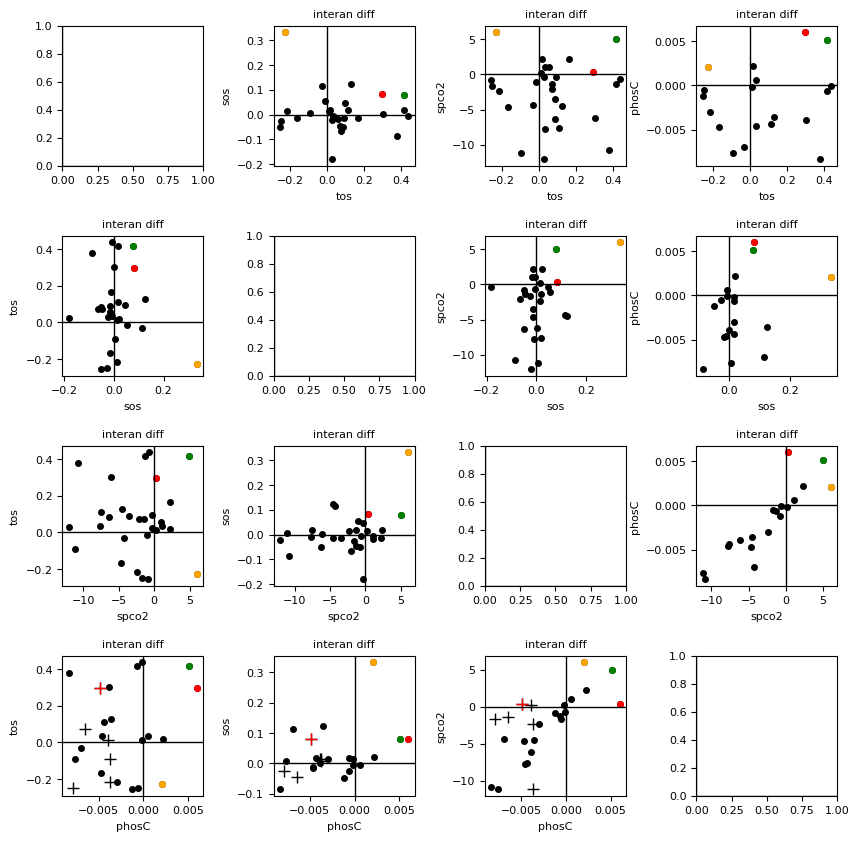

In [18]:
fig,ax=plt.subplots(4,4,figsize=(10,10),gridspec_kw={'wspace':.5,'hspace':.5})

#ax[0].remove()
def plotpoints(dfout,color):
    ax[0,1].plot(dfout.std_interan_diff_tos,dfout.std_interan_diff_sos,'.',color=color)
    ax[0,1].set_xlabel('tos')
    ax[0,1].set_ylabel('sos')
    ax[0,1].set_title('interan diff')

    ax[0,2].plot(dfout.std_interan_diff_tos,dfout.std_interan_diff_spco2,'.',color=color)
    ax[0,2].set_xlabel('tos')
    ax[0,2].set_ylabel('spco2')
    ax[0,2].set_title('interan diff')

    ax[0,3].plot(dfout.std_interan_diff_tos,dfout.std_interan_diff_phosC,'.',color=color)
    ax[0,3].set_xlabel('tos')
    ax[0,3].set_ylabel('phosC')
    ax[0,3].set_title('interan diff')

    ax[1,0].plot(dfout.std_interan_diff_sos,dfout.std_interan_diff_tos,'.',color=color)
    ax[1,0].set_xlabel('sos')
    ax[1,0].set_ylabel('tos')
    ax[1,0].set_title('interan diff')

    #ax[1,1].remove()

    ax[1,2].plot(dfout.std_interan_diff_sos,dfout.std_interan_diff_spco2,'.',color=color)
    ax[1,2].set_xlabel('sos')
    ax[1,2].set_ylabel('spco2')
    ax[1,2].set_title('interan diff')

    ax[1,3].plot(dfout.std_interan_diff_sos,dfout.std_interan_diff_phosC,'.',color=color)
    ax[1,3].set_xlabel('sos')
    ax[1,3].set_ylabel('phosC')
    ax[1,3].set_title('interan diff')

    ax[2,0].plot(dfout.std_interan_diff_spco2,dfout.std_interan_diff_tos,'.',color=color)
    ax[2,0].set_xlabel('spco2')
    ax[2,0].set_ylabel('tos')
    ax[2,0].set_title('interan diff')

    ax[2,1].plot(dfout.std_interan_diff_spco2,dfout.std_interan_diff_sos,'.',color=color)
    ax[2,1].set_xlabel('spco2')
    ax[2,1].set_ylabel('sos')
    ax[2,1].set_title('interan diff')

    #ax[2].remove()

    ax[2,3].plot(dfout.std_interan_diff_spco2,dfout.std_interan_diff_phosC,'.',color=color)
    ax[2,3].set_xlabel('spco2')
    ax[2,3].set_ylabel('phosC')
    ax[2,3].set_title('interan diff')

    ax[3,0].plot(dfout.std_interan_diff_phosC,dfout.std_interan_diff_tos,'.',color=color)
    ax[3,0].plot(dfout.std_interan_diff_phos,dfout.std_interan_diff_tos,'+',color=color)
    ax[3,0].set_xlabel('phosC')
    ax[3,0].set_ylabel('tos')
    ax[3,0].set_title('interan diff')

    ax[3,1].plot(dfout.std_interan_diff_phosC,dfout.std_interan_diff_sos,'.',color=color)
    ax[3,1].plot(dfout.std_interan_diff_phos,dfout.std_interan_diff_sos,'+',color=color)
    ax[3,1].set_xlabel('phosC')
    ax[3,1].set_ylabel('sos')
    ax[3,1].set_title('interan diff')

    ax[3,2].plot(dfout.std_interan_diff_phosC,dfout.std_interan_diff_spco2,'.',color=color)
    ax[3,2].plot(dfout.std_interan_diff_phos,dfout.std_interan_diff_spco2,'+',color=color)
    ax[3,2].set_xlabel('phosC')
    ax[3,2].set_ylabel('spco2')
    ax[3,2].set_title('interan diff')

    #ax[3,3].remove()
    return
plotpoints(dfout,'k')
plotpoints(dfout.loc[dfout.shortTitle=='Gulf of Maine'],'r')
plotpoints(dfout.loc[dfout.shortTitle=='Kodiak'],'g')
#plotpoints(dfout.loc[dfout.shortTitle=='Stratus'],'purple')
plotpoints(dfout.loc[dfout.shortTitle=='Coastal MS'],'orange')
#plotpoints(dfout.loc[dfout.shortTitle=='MOSEAN/WHOTS'],'b')
for iax in ax.flatten():
    iax.axvline(0,color='k')
    iax.axhline(0,color='k')

Text(0.5, 1.0, 'spco2 Seasonal Cycle')

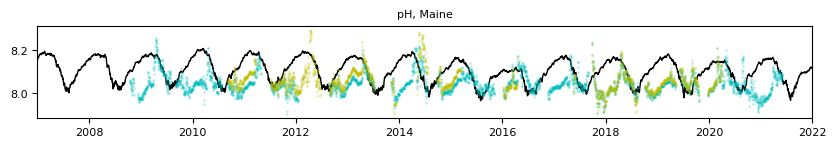

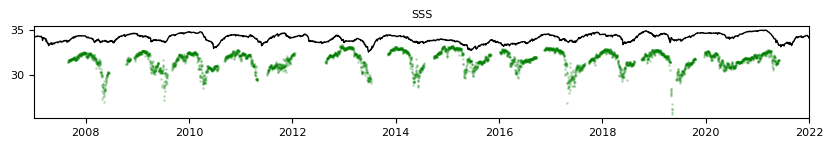

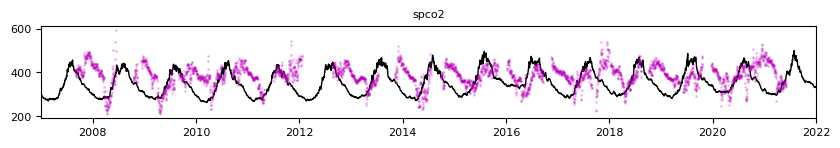

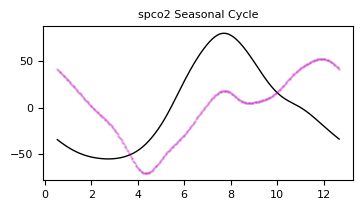

In [15]:
cph=bc.loadMoorComp(OAP.getID('Maine'),'phos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphC=bc.loadMoorComp(OAP.getID('Maine'),'phosC',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphS=bc.loadMoorComp(OAP.getID('Maine'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphP=bc.loadMoorComp(OAP.getID('Maine'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cph.mod_tdt,cph.mod_val,'k-')
ax.plot(cphC.obs_tdt,cphC.obs_val,'c.',ms=2,alpha=.2)
ax.plot(cph.obs_tdt,cph.obs_val,'y.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('pH, Maine')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphS.mod_tdt,cphS.mod_val,'k-')
ax.plot(cphS.obs_tdt,cphS.obs_val,'g.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('SSS')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphP.mod_tdt,cphP.mod_val,'k-')
ax.plot(cphP.obs_tdt,cphP.obs_val,'m.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('spco2')
fig,ax=plt.subplots(1,1,figsize=(4,2))
ax.plot(np.arange(1,366)/30+.5,cphP.mod_gsmooth,'k-')
ax.plot(np.arange(1,366)/30+.5,cphP.obs_gsmooth,'m.',ms=2,alpha=.2)
ax.set_title('spco2 Seasonal Cycle')

Text(0.5, 1.0, 'spco2 Seasonal Cycle')

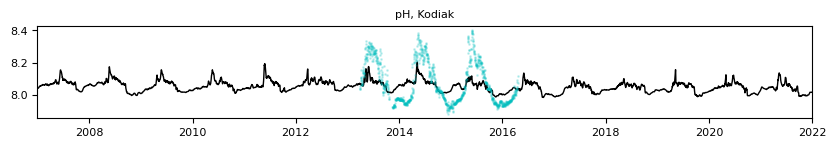

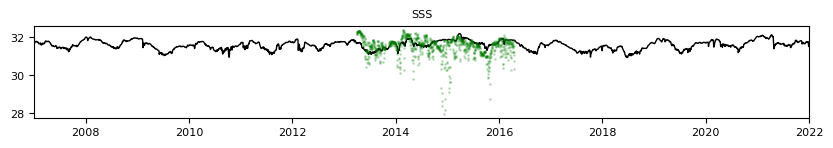

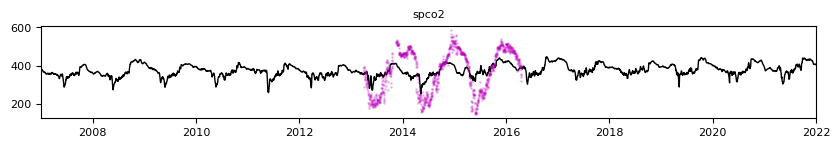

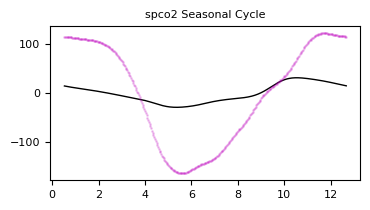

In [19]:
cph=bc.loadMoorComp(OAP.getID('Kodiak'),'phos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphC=bc.loadMoorComp(OAP.getID('Kodiak'),'phosC',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphS=bc.loadMoorComp(OAP.getID('Kodiak'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphP=bc.loadMoorComp(OAP.getID('Kodiak'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cph.mod_tdt,cph.mod_val,'k-')
ax.plot(cphC.obs_tdt,cphC.obs_val,'c.',ms=2,alpha=.2)
ax.plot(cph.obs_tdt,cph.obs_val,'y.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('pH, Kodiak')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphS.mod_tdt,cphS.mod_val,'k-')
ax.plot(cphS.obs_tdt,cphS.obs_val,'g.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('SSS')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphP.mod_tdt,cphP.mod_val,'k-')
ax.plot(cphP.obs_tdt,cphP.obs_val,'m.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('spco2')
fig,ax=plt.subplots(1,1,figsize=(4,2))
ax.plot(np.arange(1,366)/30+.5,cphP.mod_gsmooth,'k-')
ax.plot(np.arange(1,366)/30+.5,cphP.obs_gsmooth,'m.',ms=2,alpha=.2)
ax.set_title('spco2 Seasonal Cycle')

In [23]:
len(cphP.obs_val),len(cphP.obs_val)/365

(1090, 2.9863013698630136)

Text(0.5, 1.0, 'spco2 Seasonal Cycle')

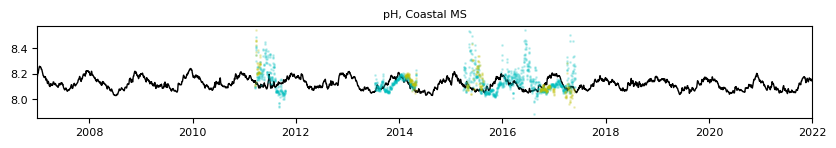

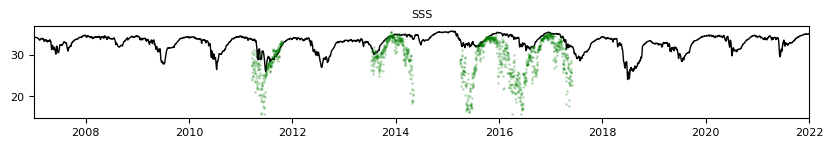

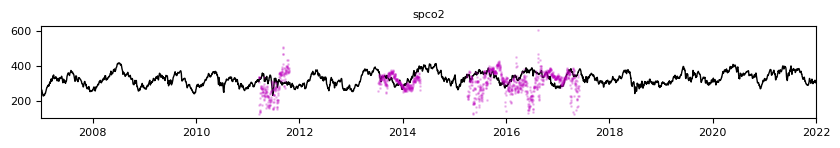

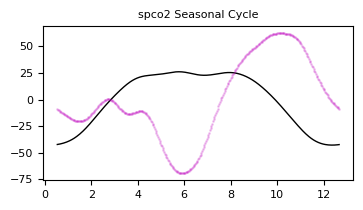

In [24]:
cph=bc.loadMoorComp(OAP.getID('Coastal MS'),'phos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphC=bc.loadMoorComp(OAP.getID('Coastal MS'),'phosC',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphS=bc.loadMoorComp(OAP.getID('Coastal MS'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphP=bc.loadMoorComp(OAP.getID('Coastal MS'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cph.mod_tdt,cph.mod_val,'k-')
ax.plot(cphC.obs_tdt,cphC.obs_val,'c.',ms=2,alpha=.2)
ax.plot(cph.obs_tdt,cph.obs_val,'y.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('pH, Coastal MS')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphS.mod_tdt,cphS.mod_val,'k-')
ax.plot(cphS.obs_tdt,cphS.obs_val,'g.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('SSS')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphP.mod_tdt,cphP.mod_val,'k-')
ax.plot(cphP.obs_tdt,cphP.obs_val,'m.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('spco2')
fig,ax=plt.subplots(1,1,figsize=(4,2))
ax.plot(np.arange(1,366)/30+.5,cphP.mod_gsmooth,'k-')
ax.plot(np.arange(1,366)/30+.5,cphP.obs_gsmooth,'m.',ms=2,alpha=.2)
ax.set_title('spco2 Seasonal Cycle')

In [25]:
len(cphP.obs_val),len(cphP.obs_val)/365

(1294, 3.5452054794520547)

Text(0.5, 1.0, 'spco2 Seasonal Cycle')

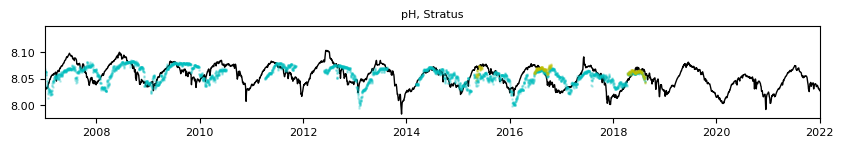

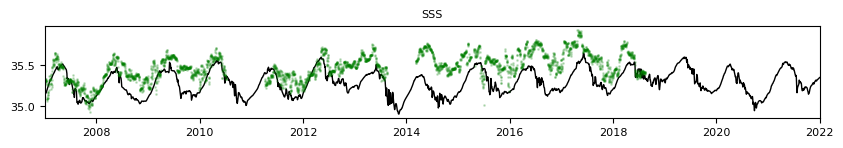

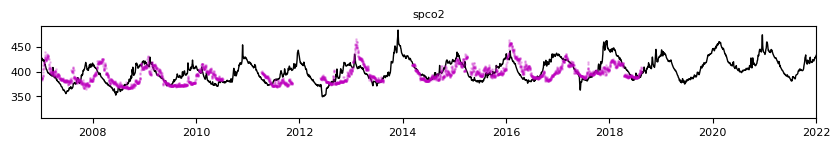

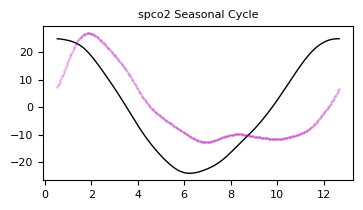

In [18]:
cph=bc.loadMoorComp(OAP.getID('Stratus'),'phos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphC=bc.loadMoorComp(OAP.getID('Stratus'),'phosC',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphS=bc.loadMoorComp(OAP.getID('Stratus'),'sos',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
cphP=bc.loadMoorComp(OAP.getID('Stratus'),'spco2',path='/work/ebo/calcs/buoyCompTS/GFDL-ESM4.1.1975_2022/comps/')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cph.mod_tdt,cph.mod_val,'k-')
ax.plot(cphC.obs_tdt,cphC.obs_val,'c.',ms=2,alpha=.2)
ax.plot(cph.obs_tdt,cph.obs_val,'y.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('pH, Stratus')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphS.mod_tdt,cphS.mod_val,'k-')
ax.plot(cphS.obs_tdt,cphS.obs_val,'g.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('SSS')
fig,ax=plt.subplots(1,1,figsize=(10,1.2))
ax.plot(cphP.mod_tdt,cphP.mod_val,'k-')
ax.plot(cphP.obs_tdt,cphP.obs_val,'m.',ms=2,alpha=.2)
ax.set_xlim(dt.datetime(2007,1,1),dt.datetime(2022,1,1))
ax.set_title('spco2')
fig,ax=plt.subplots(1,1,figsize=(4,2))
ax.plot(np.arange(1,366)/30+.5,cphP.mod_gsmooth,'k-')
ax.plot(np.arange(1,366)/30+.5,cphP.obs_gsmooth,'m.',ms=2,alpha=.2)
ax.set_title('spco2 Seasonal Cycle')